# Colormesh plots 

This file contains script of colormesh plots submitted in IJCNN paper. It also contains KNN error plots showing the impact of having 1% and 10% poisonous samples as opposed to not having any.

In [46]:
import numpy as np 
import pandas as pd 
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [47]:
# -----------------------------------------------------------------------
# # setup program constants 
# percentage of poisoning levels  
POI_RNG = [.01, .025, .05, .075, .1, .125, .15, .175, .2]
# total number of poisoning levels 
NPR = len(POI_RNG)
# percentage of features that we want to select 
SEL_PERCENT = .1
# number of algorithms that we are going to test [JMI, MIM, MRMR, MIFS]
NALG = 4
# used when we select features 
FEAT_IDX = 0
# number of cross validation runs to perform
CV = 5
# dataset names 
# did not run 
#   - bank, miniboone, ozone, spambase, connect-4, oocytes_merluccius_nucleus_4d
DATA = [
        'conn-bench-sonar-mines-rocks',
#         'ionosphere',
# #         'bank',
# #        'oocytes_trisopterus_nucleus_2f', 
# #         'statlog-german-credit', 
#         'molec-biol-promoter', 
# #         'ozone', 
# #         'spambase',
# #         'parkinsons', 
#         'oocytes_merluccius_nucleus_4d',
#         'musk-1', 
# #         'musk-2', 
# #         'chess-krvkp', 
#          'twonorm'
        ]
BOX = ['0.5', '1', '1.5', '2', '2.5']
ALGS = ['MIM', 'MIFS', 'MRMR', 'JMI']
param = ['M1', 'Kuncheva', 'KNN_Error', 'Jaccard']
# -----------------------------------------------------------------------

clrs = ['g', 'k', 'b', 'r']
mkrs = ['*', 's', 'o', '^']

#-------------------------------------------------------------------------

C:\Users\Srishti\Anaconda3\envs\research\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


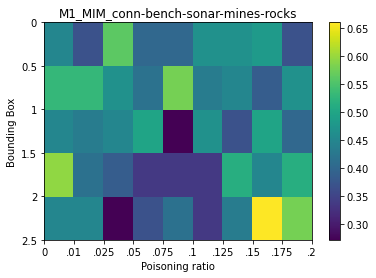

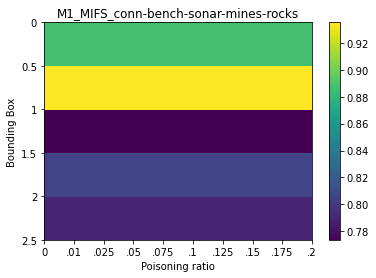

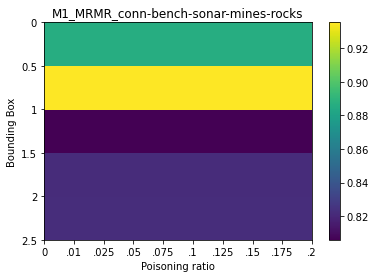

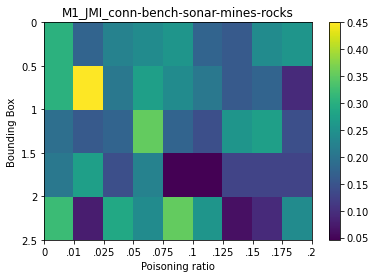

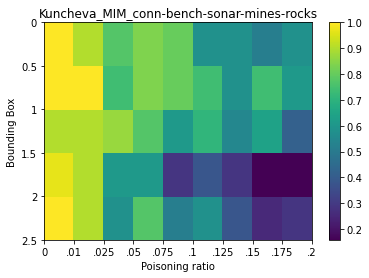

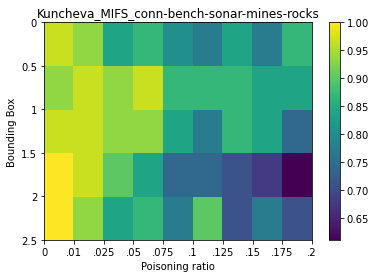

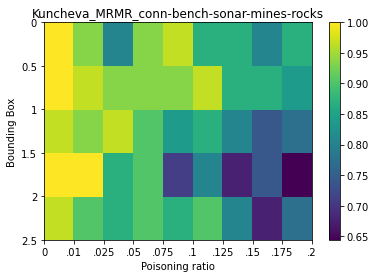

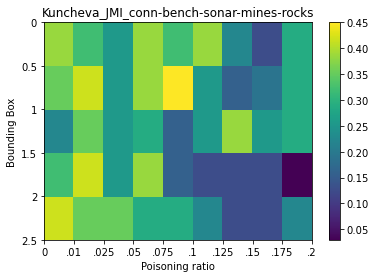

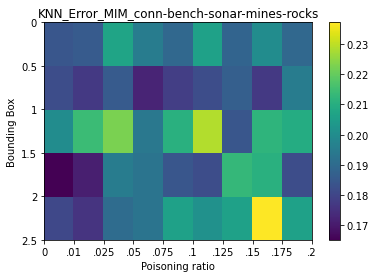

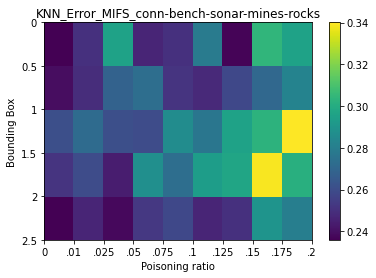

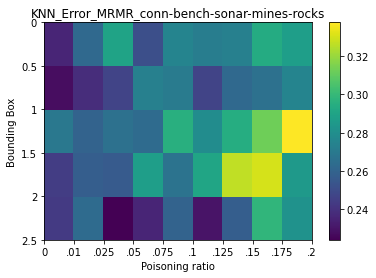

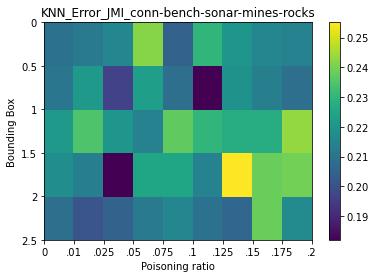

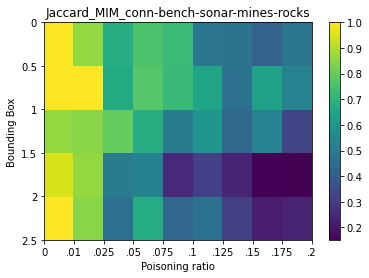

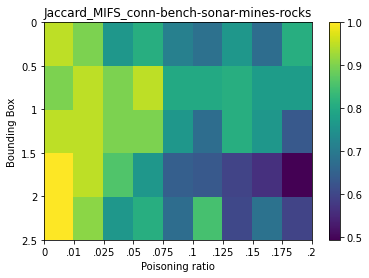

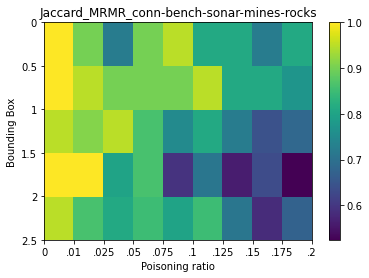

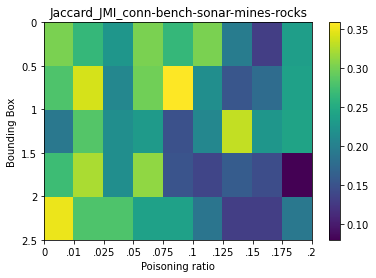

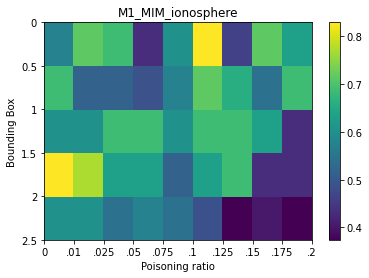

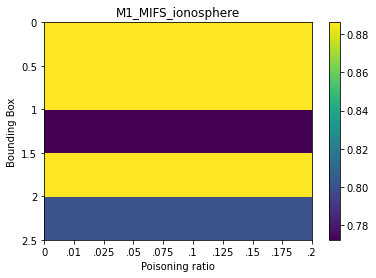

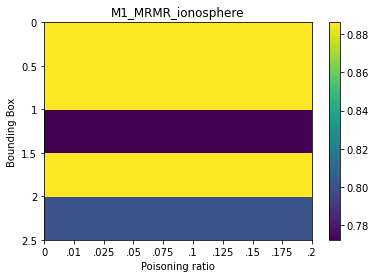

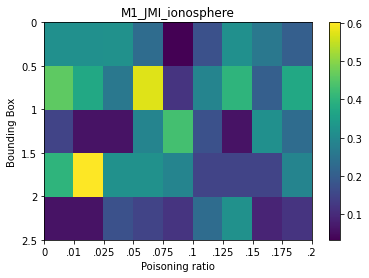

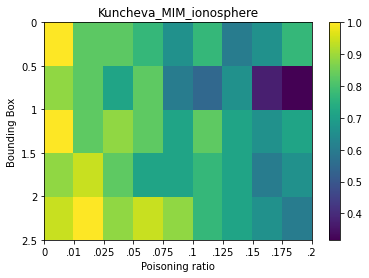

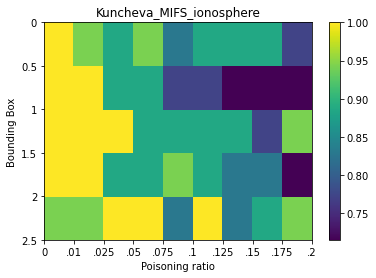

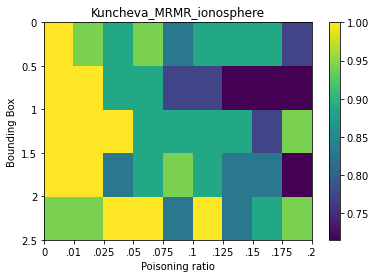

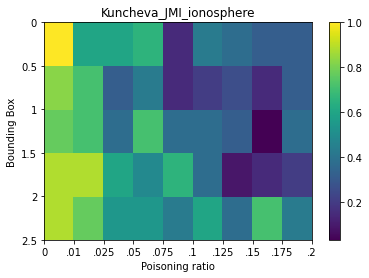

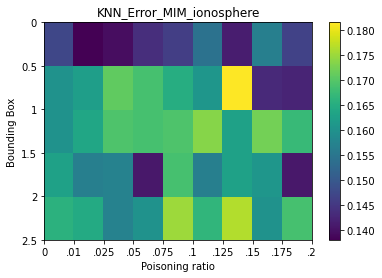

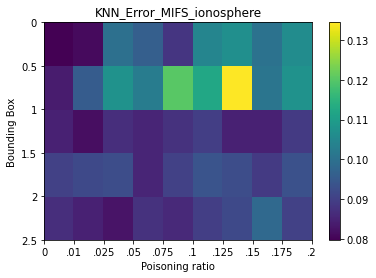

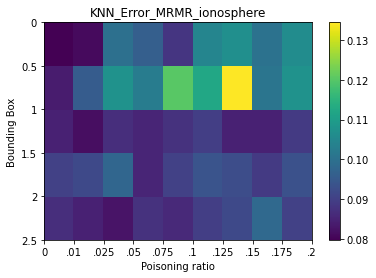

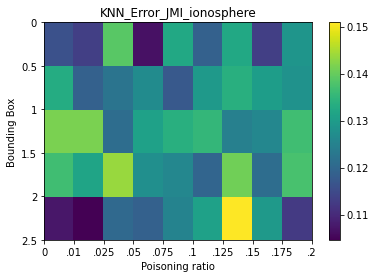

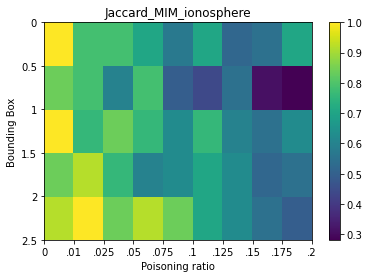

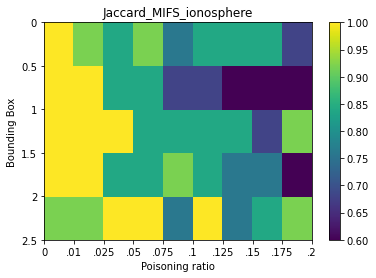

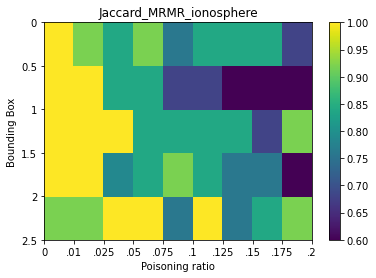

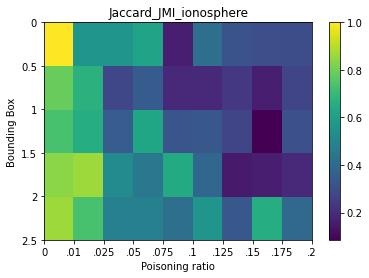

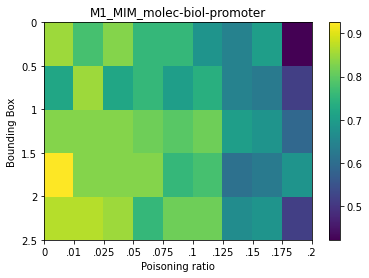

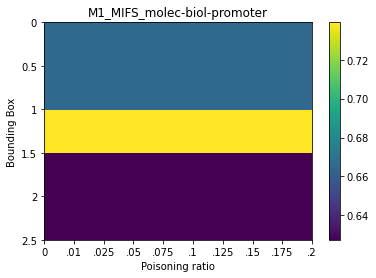

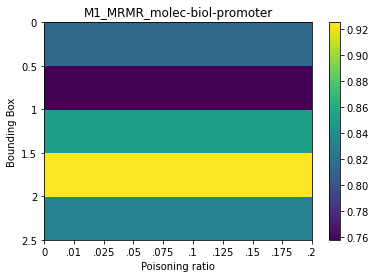

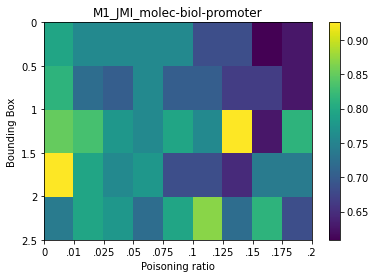

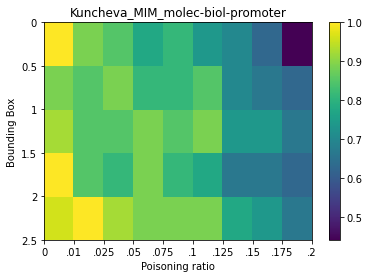

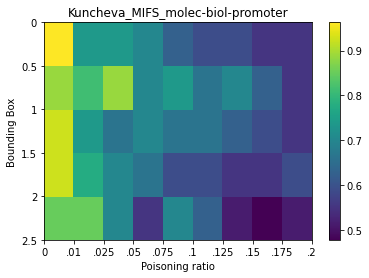

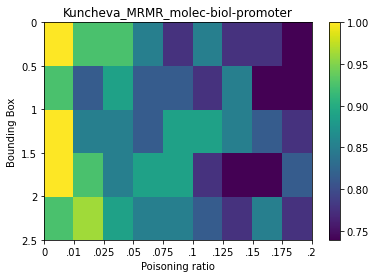

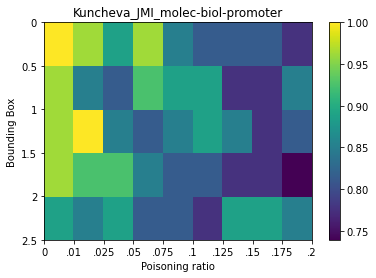

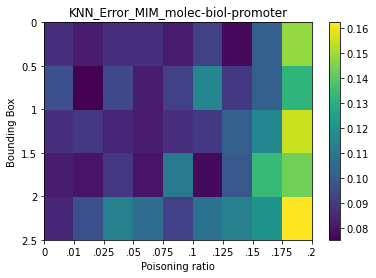

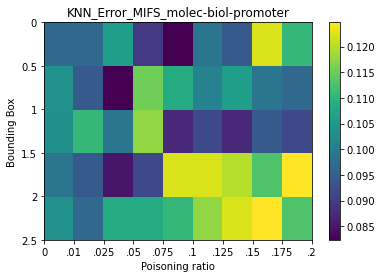

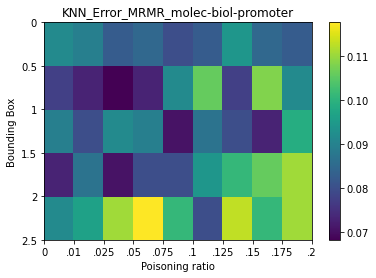

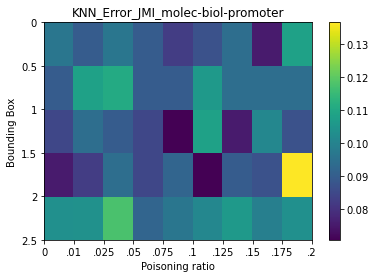

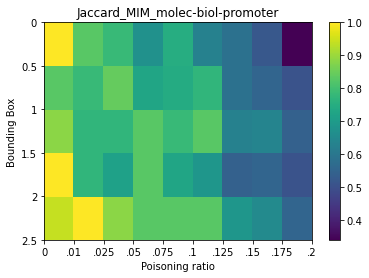

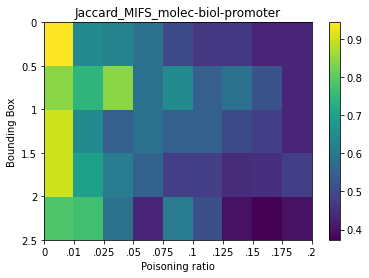

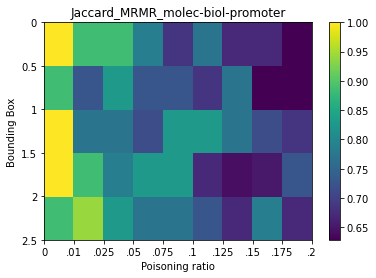

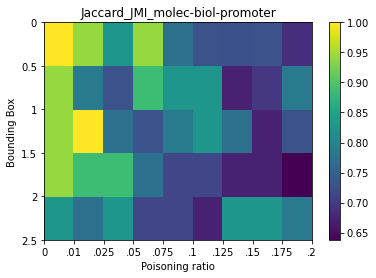

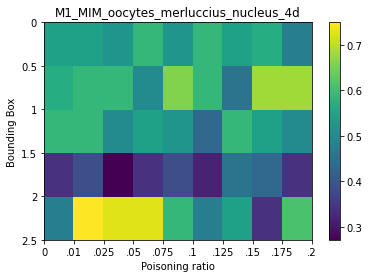

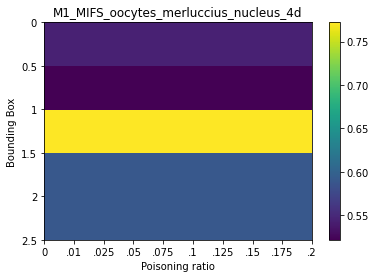

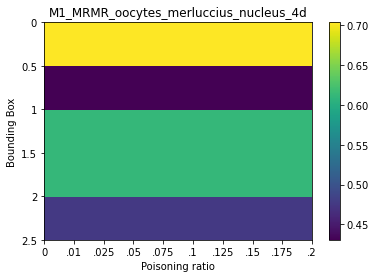

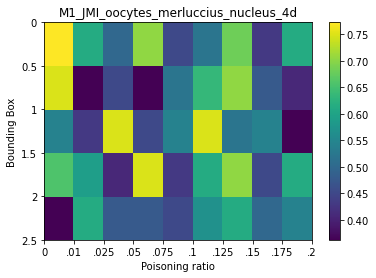

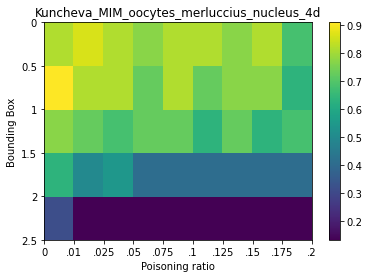

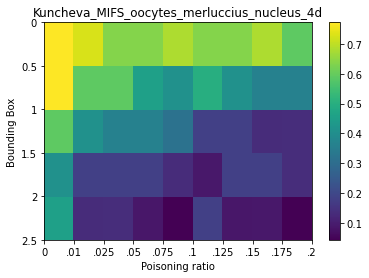

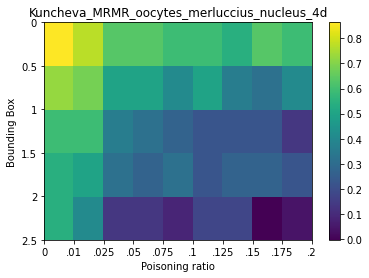

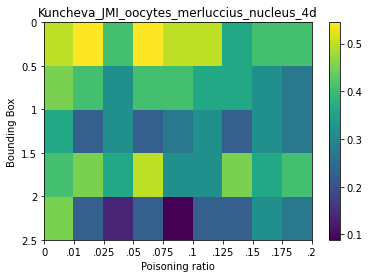

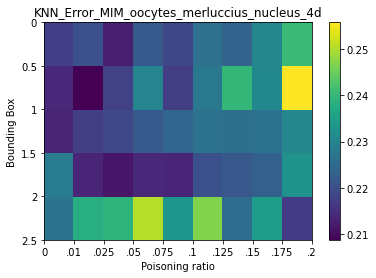

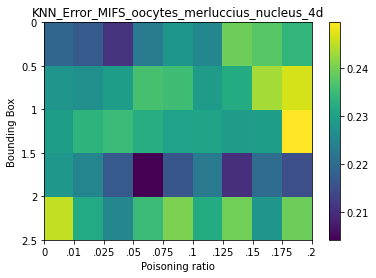

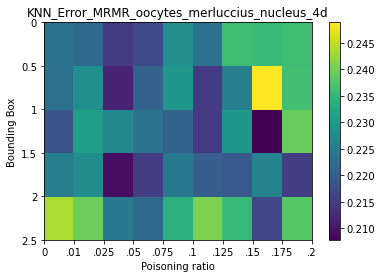

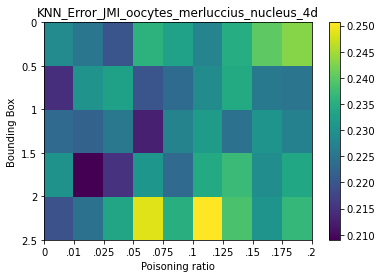

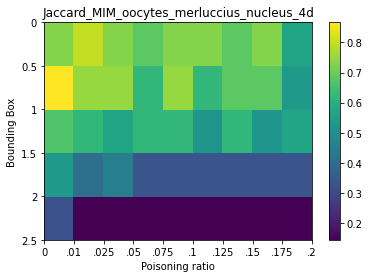

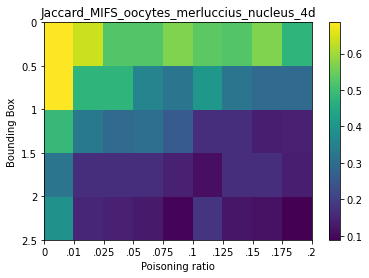

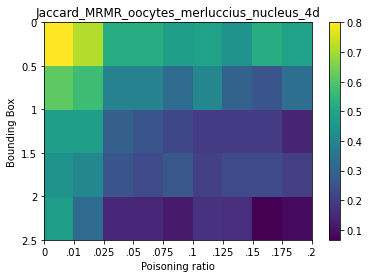

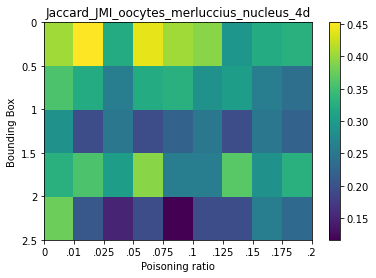

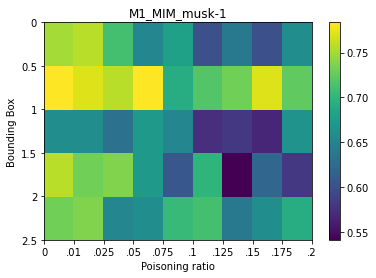

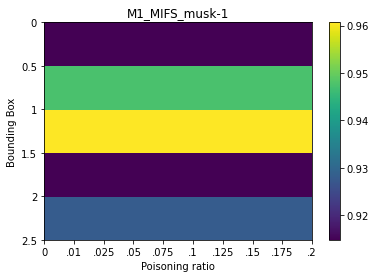

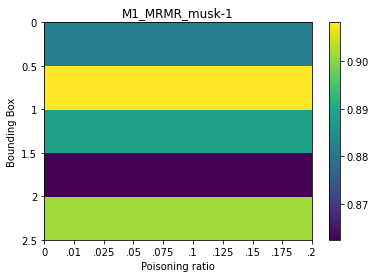

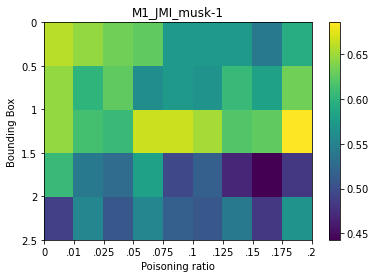

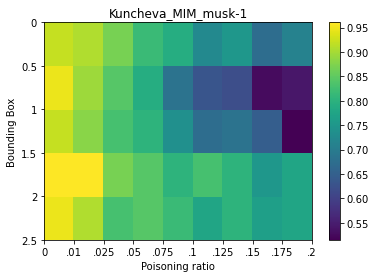

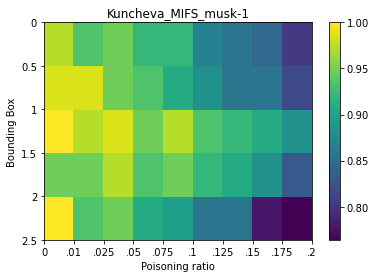

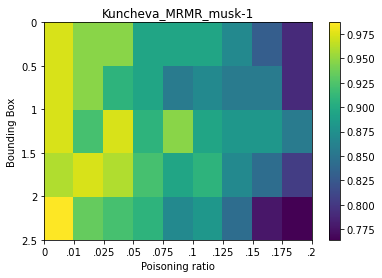

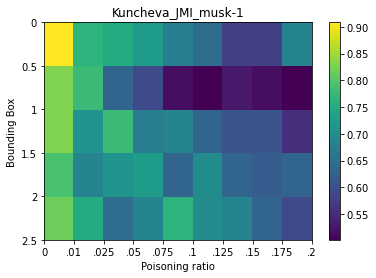

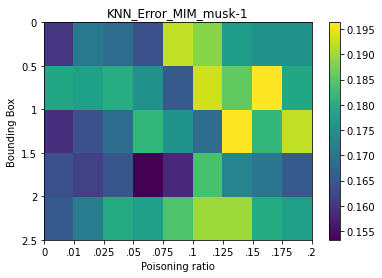

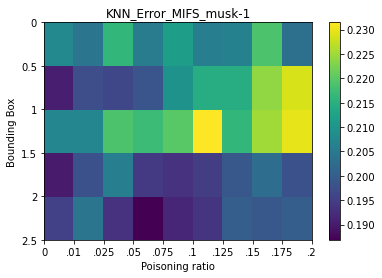

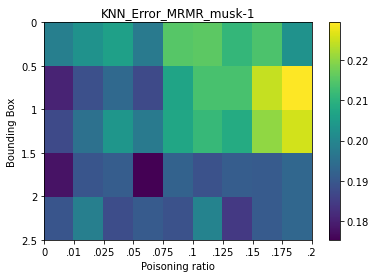

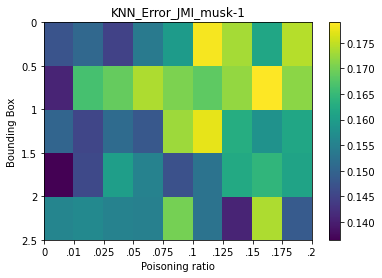

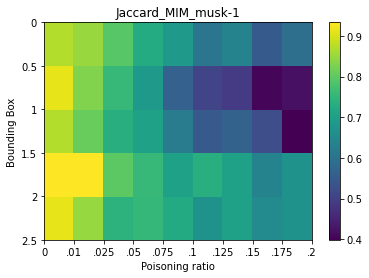

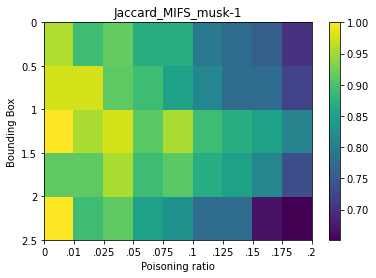

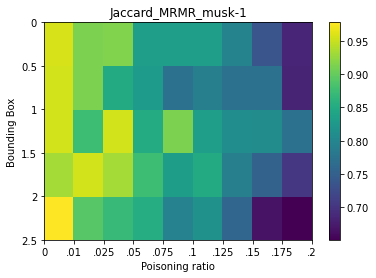

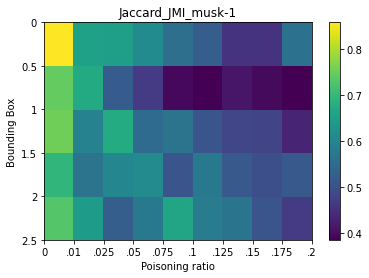

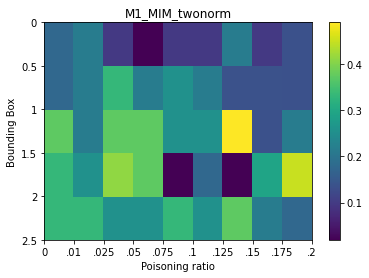

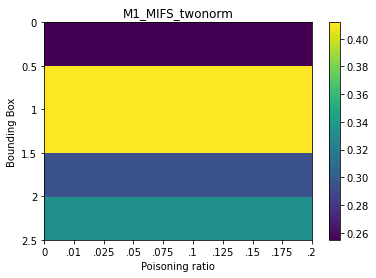

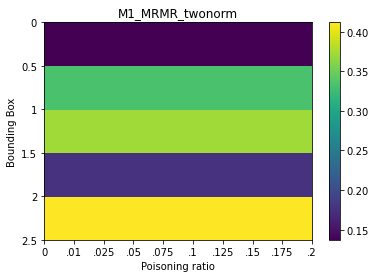

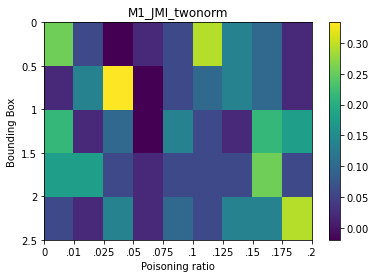

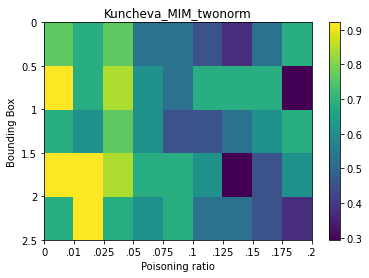

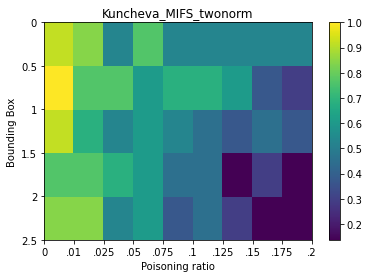

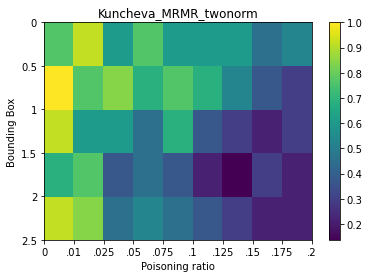

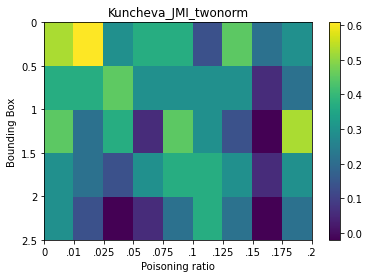

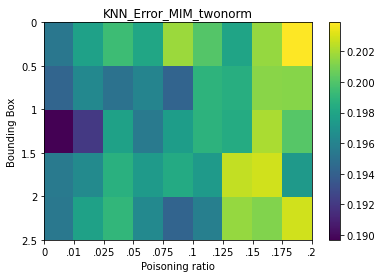

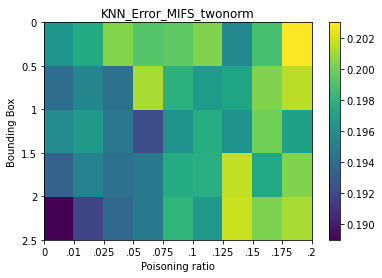

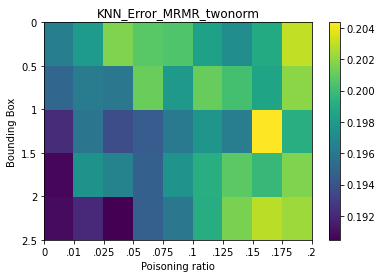

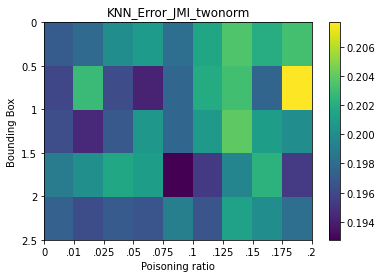

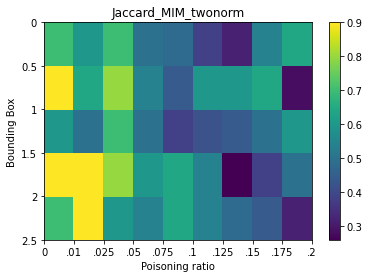

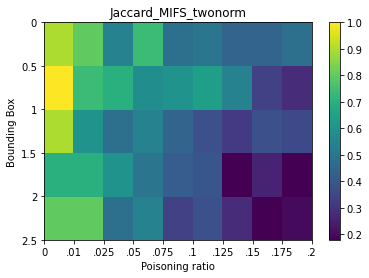

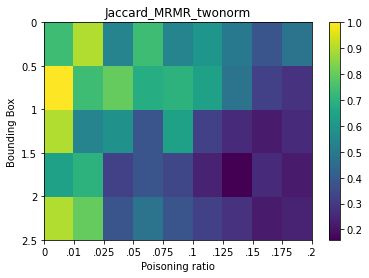

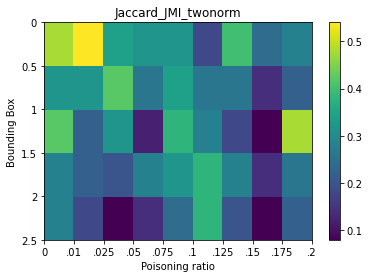

In [26]:
xval = np.array(['0', '.01', '.025', '.05', '.075', '.1', '.125', '.15', '.175', '.2'])
yval = np.array(['2.5', '2', '1.5', '1', '0.5', '0'])
for l in range(len(DATA)): 
    M = [] 
    M1 = []
    M2 = []
    M3 = []
    jacc = []
    for i in range(len(BOX)): 
        d = np.load('results/reduced_Boxsize/' + DATA[l] + '_[xiao][' + BOX[i] + ']_results.npz')
        jacc.append(d['err_jaccard'])
        M1.append(d['M1'])
        M2.append(d['M2'])
        M3.append(d['M3_pois'])   
    
    # Packing M1, M2, M3 and jacc list in single list M for unpacking later while assignment
    M.append(M1)
    M.append(M2)
    M.append(M3)
    M.append(jacc)
    
    
    # 4x4 matrix holding matrices of size 5x9
    mesh_M_A = np.zeros((len(param), NALG, len(BOX), NPR))
    for row in range(len(param)):
        for col in range(len(ALGS)):
            for b in range(len(M[0])):
                mesh_M_A[row][col][b,:] = M[row][b][:, col]
            
            #plt.figure()
            fig, ax = plt.subplots()
            c = ax.pcolormesh(xval, yval, mesh_M_A[row][col]) #, cmap = 'RdBu')
            plt.colorbar(c)
            plt.xlabel('Poisoning ratio')
            plt.ylabel('Bounding Box')       # Box values are in ascending order top to bottom, ie, 6 on yaxis refers to BOX[0] and consequently 1 on yaxis refers to Box[5]
            plt.title(str(param[row])+ '_'+ str(ALGS[col]) + '_'+ str(DATA[l]))
            plt.savefig('plots/ReducedBB_colormesh_M1_M2_M3_jacc/'+ param[row]+ '_'+ ALGS[col] + '_'+ DATA[l]+ '.pdf')

In [27]:
for l in range(len(DATA)):
    for i in range(len(BOX)): 
        d = np.load('results/reduced_Boxsize/' + DATA[l] + '_[xiao][' + BOX[i] + ']_results.npz')
        kunch = d['M2']
        Jacc = d['err_jaccard']
        KNNerror = d['M3_pois']
        print(DATA[l],"\nBox:", BOX[i], "\n")
        print("Kuncheva\n", kunch)
        print("Jaccard\n", Jacc)
        print("KNN Error\n", KNNerror)

conn-bench-sonar-mines-rocks 
Box: 0.5 

Kuncheva
 [[1.         1.         0.96765499 0.41778976]
 [0.90296496 0.93530997 0.90296496 0.35309973]
 [0.57951482 0.83827493 0.87061995 0.35309973]
 [0.77358491 0.87061995 0.90296496 0.2884097 ]
 [0.5148248  0.77358491 0.87061995 0.2884097 ]
 [0.57951482 0.90296496 0.90296496 0.22371968]
 [0.38544474 0.70889488 0.80592992 0.12668464]
 [0.25606469 0.77358491 0.67654987 0.12668464]
 [0.2884097  0.70889488 0.77358491 0.22371968]]
Jaccard
 [[1.         1.         0.95       0.35121212]
 [0.85       0.91111111 0.86111111 0.28121212]
 [0.46787879 0.76111111 0.81111111 0.28121212]
 [0.67222222 0.81111111 0.85       0.23780886]
 [0.4289899  0.67222222 0.8        0.23780886]
 [0.46787879 0.85       0.85       0.18787879]
 [0.30808081 0.60222222 0.71111111 0.13076923]
 [0.21986014 0.68333333 0.58222222 0.13076923]
 [0.23454545 0.59444444 0.67222222 0.19114219]]
KNN Error
 [[0.18083832 0.23592814 0.24311377 0.20838323]
 [0.1760479  0.24670659 0.26347305

 [0.53571429 0.29365079 0.32936508 0.23809524]]
KNN Error
 [[0.21393643 0.22787286 0.22322738 0.21442543]
 [0.20880196 0.22689487 0.22811736 0.23031785]
 [0.21784841 0.22933985 0.21173594 0.23276284]
 [0.23007335 0.23618582 0.2205379  0.2200489 ]
 [0.21711491 0.23545232 0.22958435 0.22347188]
 [0.22762836 0.22909535 0.21466993 0.22909535]
 [0.2398533  0.23202934 0.22542787 0.23422983]
 [0.23080685 0.24352078 0.24889976 0.22591687]
 [0.25574572 0.24669927 0.23643032 0.22518337]]
oocytes_merluccius_nucleus_4d 
Box: 2.5 

Kuncheva
 [[0.81777778 0.77222222 0.86333333 0.49888889]
 [0.86333333 0.72666667 0.77222222 0.54444444]
 [0.81777778 0.63555556 0.63555556 0.40777778]
 [0.77222222 0.63555556 0.63555556 0.54444444]
 [0.81777778 0.68111111 0.59       0.49888889]
 [0.81777778 0.63555556 0.59       0.49888889]
 [0.77222222 0.63555556 0.54444444 0.36222222]
 [0.81777778 0.68111111 0.63555556 0.40777778]
 [0.68111111 0.59       0.59       0.40777778]]
Jaccard
 [[0.73333333 0.68571429 0.8     

(3, 5)


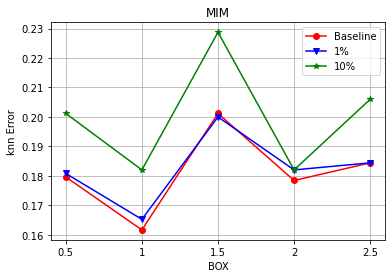

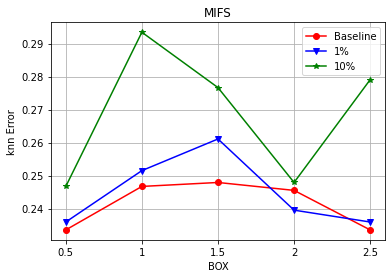

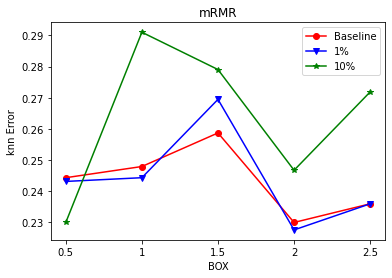

In [48]:
# Plots to study the knn error for datasets before and after injection of samples

tab_mim = np.zeros((3, len(BOX)))
tab_mifs = np.zeros((3, len(BOX)))
tab_mrmr = np.zeros((3, len(BOX)))
print(tab_mim.shape)
for l in range(len(DATA)):
    for i in range(len(BOX)): 
        d = np.load('results/reduced_Boxsize/' + DATA[l] + '_[xiao][' + BOX[i] + ']_results.npz')
        knn_norm = d['M3_norm']
        knn_pois = d['M3_pois']
        knn_pois_1 = knn_pois[0,:]
        knn_pois_10 = knn_pois[5,:]
#         print("Shape of Norm", knn_norm.shape)
#         print("Shape of 1% error", knn_pois_1.shape)
#         print("Shape of 10% error", knn_pois_10.shape)
#         print("BOX: ", BOX[i])
#         print("norm", knn_norm)
#         print("0.01 pois", knn_pois_1)
#         print("0.1 pois", knn_pois_10)
        
        tab_mim[0, i] = knn_norm[0,0]
        tab_mim[1, i] = knn_pois_1[0]
        tab_mim[2, i] = knn_pois_10[0]
        
        tab_mifs[0, i] = knn_norm[0,1]
        tab_mifs[1, i] = knn_pois_1[1]
        tab_mifs[2, i] = knn_pois_10[1]
        
        tab_mrmr[0, i] = knn_norm[0,2]
        tab_mrmr[1, i] = knn_pois_1[2]
        tab_mrmr[2, i] = knn_pois_10[2]
        
        

fig1 = plt.figure()
ax1 = plt.axes()
ax1.plot(BOX, tab_mim[0], 'ro-', label='Baseline')
ax1.plot(BOX, tab_mim[1], 'bv-', label='1%')
ax1.plot(BOX, tab_mim[2], 'g*-', label='10%')
plt.legend()
plt.grid()
plt.xlabel("BOX")
plt.ylabel("knn Error")
plt.title("MIM")
plt.show()

fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(BOX, tab_mifs[0], 'ro-', label='Baseline')
ax2.plot(BOX, tab_mifs[1], 'bv-', label='1%')
ax2.plot(BOX, tab_mifs[2], 'g*-', label='10%')
plt.legend()
plt.grid()
plt.xlabel("BOX")
plt.ylabel("knn Error")
plt.title("MIFS")
plt.show()

        
fig3 = plt.figure()
ax3 = plt.axes()
ax3.plot(BOX, tab_mrmr[0], 'ro-', label='Baseline')
ax3.plot(BOX, tab_mrmr[1], 'bv-', label='1%')
ax3.plot(BOX, tab_mrmr[2], 'g*-', label='10%')
plt.legend()
#plt.grid()
plt.xlabel("BOX")
plt.ylabel("knn Error")
plt.title("mRMR")
plt.show()       